# ** Neural Network - A Simple Perceptron Questions and Answers**

### 1. What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.

- Deep Learning is a subset of machine learning that uses artificial neural networks with many layers to automatically learn patterns and representations from large amounts of data.

- Evolution:

  1. 1950s–1980s: Early neural network models like the perceptron were introduced but faced limitations (e.g., could not solve complex problems).

  2. 1990s–2000s: With better algorithms (like backpropagation) and more computing power, neural networks improved but were still limited by data and hardware.

  3. 2010s onwards: Growth in big data, powerful GPUs, and advanced architectures (like CNNs and RNNs) led to the rise of deep learning. Breakthroughs in image recognition, speech processing, and natural language understanding accelerated its adoption.

- Difference from Traditional Machine Learning:

  1. Feature Engineering: Traditional ML often requires manual feature extraction (e.g., selecting important inputs). Deep learning automatically learns these features from raw data.

  2. Data Requirements: Traditional ML works well with small to medium datasets, while deep learning typically requires large datasets.

  3. Performance: Deep learning models generally achieve higher accuracy in complex tasks like computer vision, speech recognition, and natural language processing.

- In short: Deep learning is machine learning with neural networks that learn features automatically, powered by large data and computation.

--

### 2. Explain the basic architecture and functioning of a Perceptron. What are its limitations?

- A Perceptron is the simplest type of artificial neural network, introduced by Frank Rosenblatt in 1958. Its architecture consists of:

  1. Inputs: Features of the data, each multiplied by a weight.

  2. Summation function: Adds up the weighted inputs.

  3. Activation function: Applies a threshold to decide the output (e.g., 0 or 1).

- Functioning: The perceptron takes input values, multiplies them by weights, adds a bias, and passes the result through an activation function. During training, the weights are adjusted to minimize errors.

- Limitations:

  1. Can only solve linearly separable problems (e.g., AND, OR) but fails on non-linear problems like XOR.

  2. Cannot capture complex patterns due to its simple, single-layer structure.

  3. Limited learning capability compared to modern deep neural networks.

- In short: A perceptron is a basic building block of neural networks, useful but too simple for complex real-world tasks.

--

### 3. Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

- The activation function in a neural network introduces non-linearity, allowing the model to learn complex patterns beyond simple linear relationships. Without it, the network would behave like just a linear model, no matter how many layers it has.

- Comparison:

  1. Sigmoid: Outputs values between 0 and 1. Good for probabilities, but suffers from vanishing gradient and slow training.

  2. Tanh: Outputs between -1 and 1. Zero-centered, better than sigmoid, but still faces vanishing gradient issues.

  3. ReLU (Rectified Linear Unit): Outputs 0 for negative inputs and the same value for positive inputs. Simple, fast, and avoids vanishing gradient in most cases, but can suffer from the “dying ReLU” problem.

- In short: Activation functions make neural networks powerful; among them, ReLU is most commonly used today due to efficiency.

--

### 4. What is the difference between Loss function and Cost function in neural networks? Provide examples.

- In neural networks, both loss function and cost function measure errors, but they differ in scope:

  1. Loss Function: Measures the error for a single training example.Example: Mean Squared Error (MSE) for one data point, Binary Cross-Entropy for one prediction.

  2. Cost Function: The average of the loss functions across the entire training dataset. It represents the overall performance of the model.Example: Average MSE over all samples, Categorical Cross-Entropy averaged across the dataset.

- In short: Loss = error for one sample, Cost = average error for all samples.

--

### 5. What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

- The optimizer in a neural network updates the model’s weights to minimize the cost function and improve accuracy. It decides how fast and in what direction the learning happens.

- Comparison:

  1. Gradient Descent: Updates weights by moving step-by-step in the direction of the steepest descent of the cost function. Simple but can be slow and get stuck in local minima.

  2. RMSprop: Uses a moving average of squared gradients to adjust learning rates, making training faster and more stable, especially for recurrent networks.

  3. Adam (Adaptive Moment Estimation): Combines momentum and RMSprop ideas, adapting learning rates and accelerating convergence. It is the most widely used due to efficiency and reliability.

- In short: Optimizers control weight updates; Adam is generally preferred, RMSprop is good for sequence tasks, and plain Gradient Descent is basic but less efficient.

--

# **Practical Questions and Answers**

Use NumPy, Matplotlib, and Tensorflow/Keras for implementation

Epoch 1/20, Total Error: [3]
Epoch 2/20, Total Error: [3]
Epoch 3/20, Total Error: [3]
Epoch 4/20, Total Error: [1]
Epoch 5/20, Total Error: [1]
Epoch 6/20, Total Error: [2]
Epoch 7/20, Total Error: [1]
Epoch 8/20, Total Error: [0]
Epoch 9/20, Total Error: [0]
Epoch 10/20, Total Error: [0]
Epoch 11/20, Total Error: [0]
Epoch 12/20, Total Error: [0]
Epoch 13/20, Total Error: [0]
Epoch 14/20, Total Error: [0]
Epoch 15/20, Total Error: [0]
Epoch 16/20, Total Error: [0]
Epoch 17/20, Total Error: [0]
Epoch 18/20, Total Error: [0]
Epoch 19/20, Total Error: [0]
Epoch 20/20, Total Error: [0]

Final Weights: [0.17454012 0.35071431]
Final Bias: [-0.46800606]

Testing AND Gate:
Input: [0 0], Predicted: [0], Actual: 0
Input: [0 1], Predicted: [0], Actual: 0
Input: [1 0], Predicted: [0], Actual: 0
Input: [1 1], Predicted: [1], Actual: 1


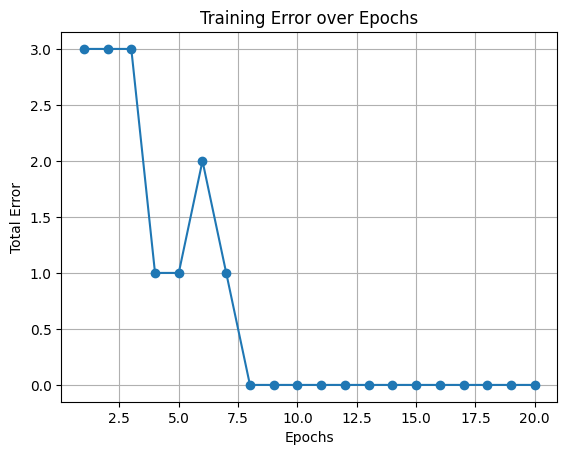

In [1]:
#1. Write a Python program to implement a single-layer perceptron from scratch using NumPy to solve the logical AND gate.

# AND Gate Perceptron Implementation from Scratch

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define dataset (AND gate truth table)
# Inputs (X) and Outputs (Y)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([0, 0, 0, 1])  # AND gate output

# Step 2: Initialize parameters
np.random.seed(42)   # for reproducibility
weights = np.random.rand(2)  # two inputs → two weights
bias = np.random.rand(1)
learning_rate = 0.1
epochs = 20

# Activation Function: Step function
def step_function(z):
    return np.where(z >= 0, 1, 0)

# For tracking error during training
errors = []

# Step 3: Training the perceptron
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        y_pred = step_function(z)
        error = Y[i] - y_pred
        # Weight and bias update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
        total_error += abs(error)
    errors.append(total_error)
    print(f"Epoch {epoch+1}/{epochs}, Total Error: {total_error}")

print("\nFinal Weights:", weights)
print("Final Bias:", bias)

# Step 4: Predictions
print("\nTesting AND Gate:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    y_pred = step_function(z)
    print(f"Input: {X[i]}, Predicted: {y_pred}, Actual: {Y[i]}")

# Step 5: Plotting error over epochs
plt.plot(range(1, epochs+1), errors, marker='o')
plt.title("Training Error over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.grid()
plt.show()


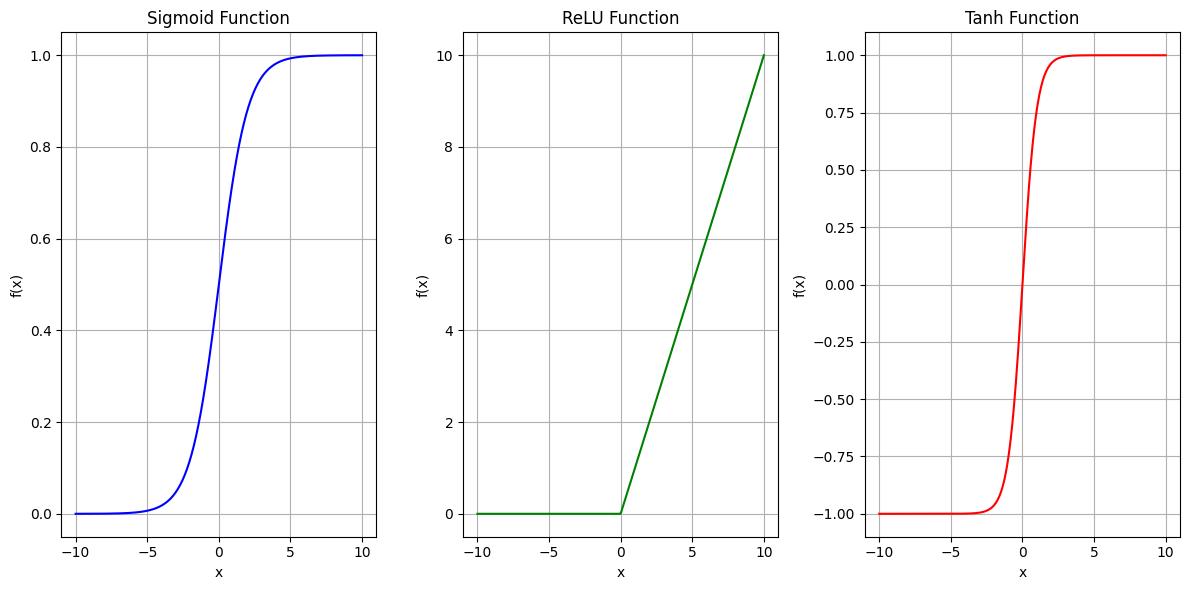

In [2]:
#2. Implement and visualize Sigmoid, ReLU, and Tanh activation functions using Matplotlib.

# Activation Functions Visualization: Sigmoid, ReLU, and Tanh

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define input range
x = np.linspace(-10, 10, 500)

# Step 2: Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Step 3: Compute outputs
y_sigmoid = sigmoid(x)
y_relu = relu(x)
y_tanh = tanh(x)

# Step 4: Plot activation functions
plt.figure(figsize=(12, 6))

# Sigmoid
plt.subplot(1, 3, 1)
plt.plot(x, y_sigmoid, color="blue")
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# ReLU
plt.subplot(1, 3, 2)
plt.plot(x, y_relu, color="green")
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

# Tanh
plt.subplot(1, 3, 3)
plt.plot(x, y_tanh, color="red")
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)

plt.tight_layout()
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 - 9s - 5ms/step - accuracy: 0.9256 - loss: 0.2550 - val_accuracy: 0.9602 - val_loss: 0.1323
Epoch 2/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9665 - loss: 0.1085 - val_accuracy: 0.9722 - val_loss: 0.0944
Epoch 3/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9774 - loss: 0.0745 - val_accuracy: 0.9733 - val_loss: 0.0886
Epoch 4/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9822 - loss: 0.0573 - val_accuracy: 0.9768 - val_loss: 0.0802
Epoch 5/5
1688/1688 - 8s - 5ms/step - accuracy: 0.9861 - loss: 0.0420 - val_accuracy: 0.9775 - val_loss: 0.0820

Final Training Accuracy: 0.9861
Test Accuracy: 0.9762


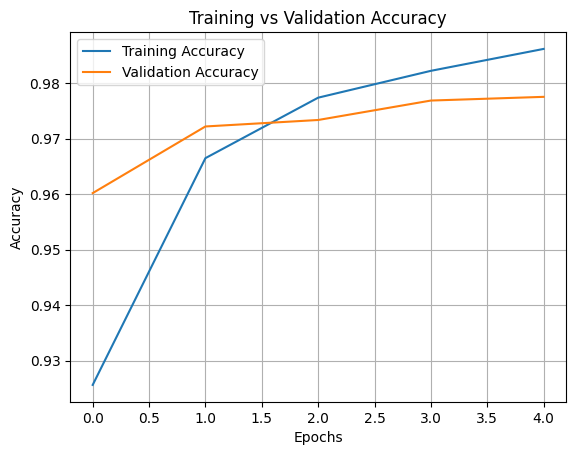

In [3]:
#3. Use Keras to build and train a simple multilayer neural network on the MNIST digits dataset. Print the training accuracy.

# Multilayer Neural Network on MNIST using Keras

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Step 2: Preprocess data
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# Step 3: Build neural network
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),  # hidden layer 1
    layers.Dense(64, activation="relu"),                       # hidden layer 2
    layers.Dense(10, activation="softmax")                     # output layer (10 classes)
])

# Step 4: Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Step 5: Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=2)

# Step 6: Print training accuracy
train_acc = history.history["accuracy"][-1]
print(f"\nFinal Training Accuracy: {train_acc:.4f}")

# Step 7: Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# Step 8: Plot training accuracy curve
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
844/844 - 6s - 7ms/step - accuracy: 0.8235 - loss: 0.4987 - val_accuracy: 0.8545 - val_loss: 0.4053
Epoch 2/10
844/844 - 5s - 6ms/step - accuracy: 0.8681 - loss: 0.3622 - val_accuracy: 0.8635 - val_loss: 0.3664
Epoch 3/10
844/844 - 10s - 12ms/step - accuracy: 0.8784 - loss: 0.3289 - val_accuracy: 0.8732 - val_loss: 0.3418
Epoch 4/10
844/844 - 6s - 7ms/step - accuracy: 0.8865 - loss: 0.3050 - val_accuracy: 0.8755 - val_loss: 0.3423
Epoch 5/10
844/844 - 5s - 6ms/step - accuracy: 0.8948 - loss: 0.2834 - val_accuracy: 0.8747 - val_loss: 0.3316
Epoch 6/10
844/844 - 6s - 7ms/step - accuracy: 0.8982 - loss: 0.2731 - val_accuracy: 0.8805 - val_loss: 0.3289
Epoch 7/10
844/844 - 5s - 6ms/step - accuracy: 0.9036 - loss: 0.2567 - val_accuracy: 0.8892 - val_loss: 0.3122
Epoch 8/10
844/844 - 5s - 6ms/ste

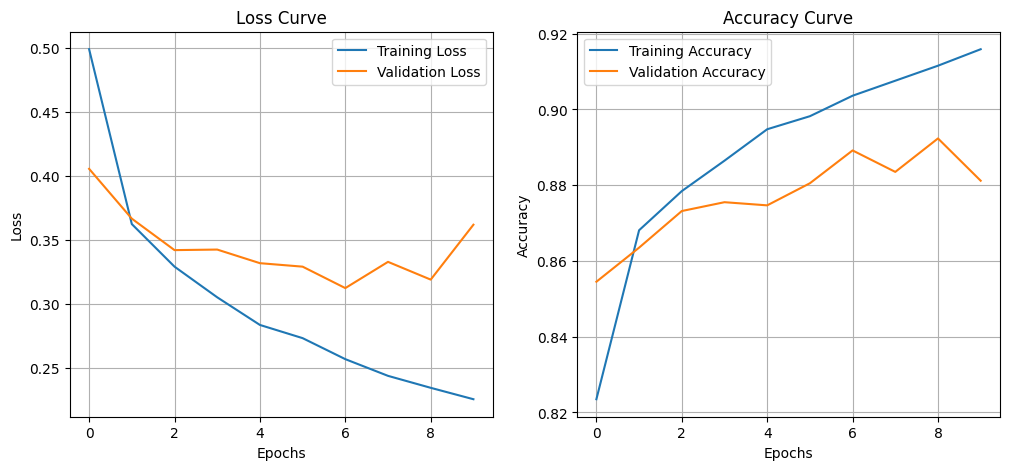


Test Accuracy: 0.8756


In [4]:
#4. Visualize the loss and accuracy curves for a neural network model trained on the Fashion MNIST dataset. Interpret the training behavior

# Neural Network on Fashion MNIST with Loss & Accuracy Visualization

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Step 2: Preprocess data
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0

# Step 3: Build model
model = keras.Sequential([
    layers.Dense(256, activation="relu", input_shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

# Step 4: Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Step 5: Train model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1,
                    verbose=2)

# Step 6: Plot Loss and Accuracy curves
plt.figure(figsize=(12,5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy Curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.show()

# Step 7: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Class Weights: {0: np.float64(0.528296902859407), 1: np.float64(9.334889148191365)}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
200/200 - 2s - 12ms/step - accuracy: 0.8007 - loss: 0.4777 - val_accuracy: 0.9041 - val_loss: 0.2899
Epoch 2/20
200/200 - 1s - 3ms/step - accuracy: 0.8823 - loss: 0.3499 - val_accuracy: 0.9328 - val_loss: 0.2231
Epoch 3/20
200/200 - 1s - 3ms/step - accuracy: 0.9039 - loss: 0.3242 - val_accuracy: 0.9297 - val_loss: 0.2391
Epoch 4/20
200/200 - 1s - 3ms/step - accuracy: 0.9173 - loss: 0.2878 - val_accuracy: 0.9516 - val_loss: 0.1980
Epoch 5/20
200/200 - 1s - 3ms/step - accuracy: 0.9308 - loss: 0.2701 - val_accuracy: 0.9625 - val_loss: 0.1547
Epoch 6/20
200/200 - 1s - 3ms/step - accuracy: 0.9358 - loss: 0.2577 - val_accuracy: 0.9481 - val_loss: 0.2128
Epoch 7/20
200/200 - 1s - 6ms/step - accuracy: 0.9358 - loss: 0.2528 - val_accuracy: 0.9553 - val_loss: 0.1877
Epoch 8/20
200/200 - 1s - 3ms/step - accuracy: 0.9423 - loss: 0.2432 - val_accuracy: 0.9716 - val_loss: 0.1481
Epoch 9/20
200/200 - 1s - 7ms/step - accuracy: 0.9496 - loss: 0.2312 - val_accuracy: 0.9688 - val_loss: 0.1650


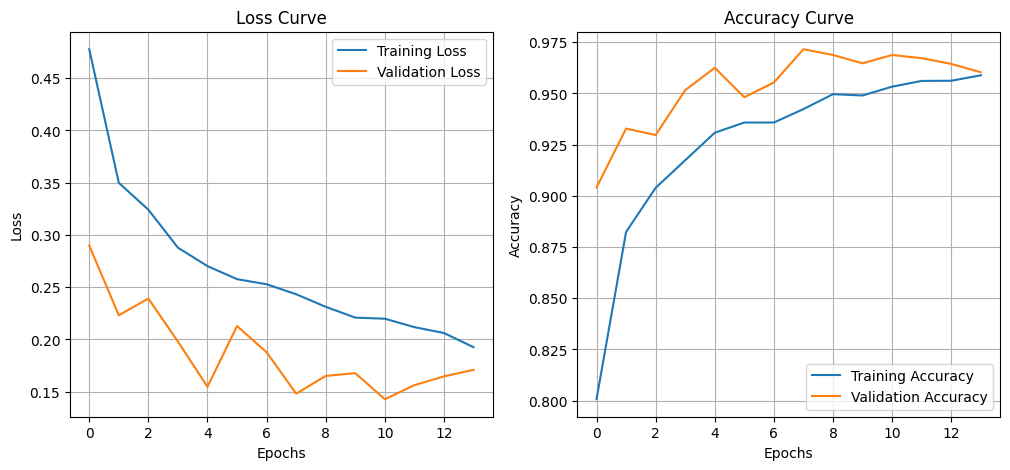

In [5]:
'''
#5. You are working on a project for a bank that wants to automatically detect
fraudulent transactions. The dataset is large, imbalanced, and contains structured
features like transaction amount, merchant ID, and customer location. The goal is to
classify each transaction as fraudulent or legitimate.

Explain your real-time data science workflow:

● How would you design a deep learning model (perceptron or multilayer NN)?
● Which activation function and loss function would you use, and why?
● How would you train and evaluate the model, considering class imbalance?
● Which optimizer would be suitable, and how would you prevent overfitting?
'''

# Fraud Detection Workflow in Google Colab

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score

import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Simulate an imbalanced dataset (fraud detection scenario)
X, y = make_classification(n_samples=20000, n_features=20, n_informative=10,
                           n_redundant=5, n_classes=2,
                           weights=[0.95, 0.05], # 95% legit, 5% fraud
                           random_state=42)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 3: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Compute class weights to handle imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Step 5: Build MLP model
model = Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid")  # binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 6: Train with EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2,
                    class_weight=class_weights,
                    callbacks=[es],
                    verbose=2)

# Step 7: Evaluate
y_pred = model.predict(X_test).ravel()
y_pred_class = (y_pred > 0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred_class))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Step 8: Plot Loss & Accuracy curves
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()
plt.grid()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid()

plt.show()


Real-time Data Science Workflow for Fraud Detection

1. Model Design - Since the dataset has structured/tabular features (transaction amount, merchant ID, location, etc.), I would design a Multilayer Perceptron (MLP) with:

  - Input layer: One node per feature.

  - Hidden layers: 2–3 dense layers (e.g., 128 → 64 → 32 units) with ReLU activation.

  - Output layer: Single neuron with Sigmoid activation to predict probability of fraud (0 or 1).


--

2. Activation Function & Loss Function

  - Hidden layers: ReLU → prevents vanishing gradient and trains faster.

  - Output layer: Sigmoid → converts output into probability (0–1).

  - Loss function: Binary Cross-Entropy (BCE) → well-suited for binary classification, penalizes wrong predictions strongly.

--

3. Training & Evaluation (Handling Imbalance)

  - Problem: Fraudulent transactions are rare compared to legitimate ones → class imbalance.

  - Solutions:

    - Use class weights in loss function (give higher weight to fraud class).
    - Try oversampling fraud cases (SMOTE) or undersampling majority class.
    - Evaluate using Precision, Recall, F1-score, ROC-AUC, not just accuracy (accuracy is misleading in imbalanced data).

  --

4. Optimizer & Overfitting Prevention

  - Optimizer: Adam → efficient, adaptive learning rate, widely used in tabular classification.

  - Overfitting prevention:

    - Dropout layers (e.g., 0.3–0.5).
    - Early stopping based on validation loss.
    - Regularization (L2) to prevent weight explosion.
    - Cross-validation for robust evaluation.

--

Final Workflow Summary

1. Preprocess structured features (scaling, encoding).

2. Build an MLP with ReLU hidden layers + Sigmoid output.

3. Train using Binary Cross-Entropy loss + Adam optimizer.

4. Handle class imbalance via class weights/SMOTE.

5. Prevent overfitting with dropout + early stopping.

6. Evaluate with ROC-AUC, Precision-Recall, F1, not just accuracy.

This ensures the model learns effectively even from imbalanced data and performs well in detecting fraud in real-time banking transactions.